# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [25]:
# Resolver acá
import os
import pandas as pd
import matplotlib 
os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')
#os.chdir('c:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP2/TP2')

In [74]:
airbnb = pd.read_csv('Base Airbnb NY.csv')
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)
airbnb = airbnb.drop_duplicates(subset = 'id', keep = 'first')
# Missing values: como los NaN que aparecian correspondian con que en el number_of_reviews era 0, significa que hay 0 reviews_per_months. Por lo tanto, decidimos reemplazar esos NaN por 0.
airbnb = airbnb.dropna()
airbnb = airbnb[airbnb['availability_365'] > 0] #hicimos esto porque en el histograma de availability estaba raro porque tenia valores negativos q no tenian sentido porque disponibilidad nopuede ser neg
airbnb = airbnb[airbnb['price'] > 0] #No tiene sentido que un departamento sea gratis
airbnb = airbnb[airbnb['minimum_nights'] > 0] #No tiene sentido que el min requerido de noches sea 0
airbnb = airbnb[airbnb['number_of_reviews'] > 0] 
airbnb = airbnb[airbnb['reviews_per_month'] > 0]
airbnb = airbnb[airbnb['calculated_host_listings_count']> 0] #No tiene sentido que el oferente tenga 0 propiedades

In [75]:
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129.0,1,1,1.00,1,147
48790,36427429,Queens,Flushing,40.75104,-73.81459,Private room,45.0,1,1,1.00,6,339
48799,36438336,Staten Island,Great Kills,40.54179,-74.14275,Private room,235.0,1,1,1.00,1,87
48805,36442252,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100.0,1,2,2.00,1,40


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

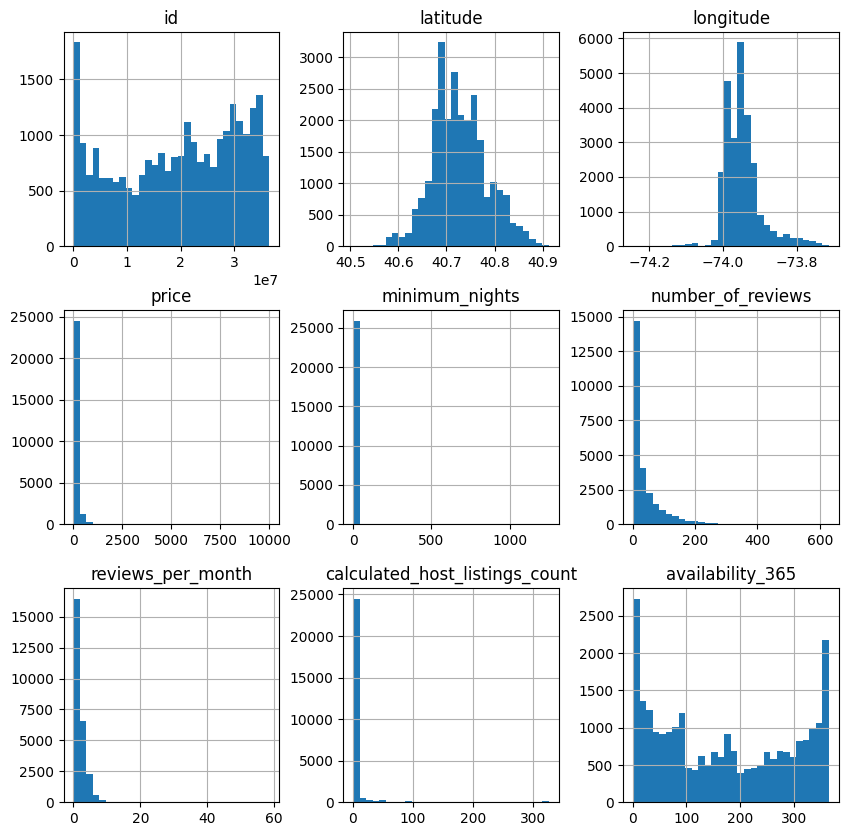

In [76]:
airbnb.hist(figsize = (10,10), bins = 30)

In [77]:
import numpy as np
#transformamos las columnas necesarias a log 
# Columnas a las que aplicar logaritmo
columnas_log = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

#Aplicar logaritmo a las columnas seleccionadas
airbnb[columnas_log] = np.log(airbnb[columnas_log])
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.003946,0.000000,2.197225,-1.560648,1.791759,5.899897
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,3.806662,-0.967584,0.693147,5.872118
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,5.598422,1.534714,0.000000,5.267858
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,4.304065,-0.527633,0.000000,4.859812
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,4.369448,0.693147,6.063785,1.244155,0.000000,5.393628
...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Manhattan,Upper East Side,40.78099,-73.95366,Private room,4.859812,0.000000,0.000000,0.000000,0.000000,4.990433
48790,36427429,Queens,Flushing,40.75104,-73.81459,Private room,3.806662,0.000000,0.000000,0.000000,1.791759,5.826000
48799,36438336,Staten Island,Great Kills,40.54179,-74.14275,Private room,5.459586,0.000000,0.000000,0.000000,0.000000,4.465908
48805,36442252,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,4.605170,0.000000,0.693147,0.693147,0.000000,3.688879


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

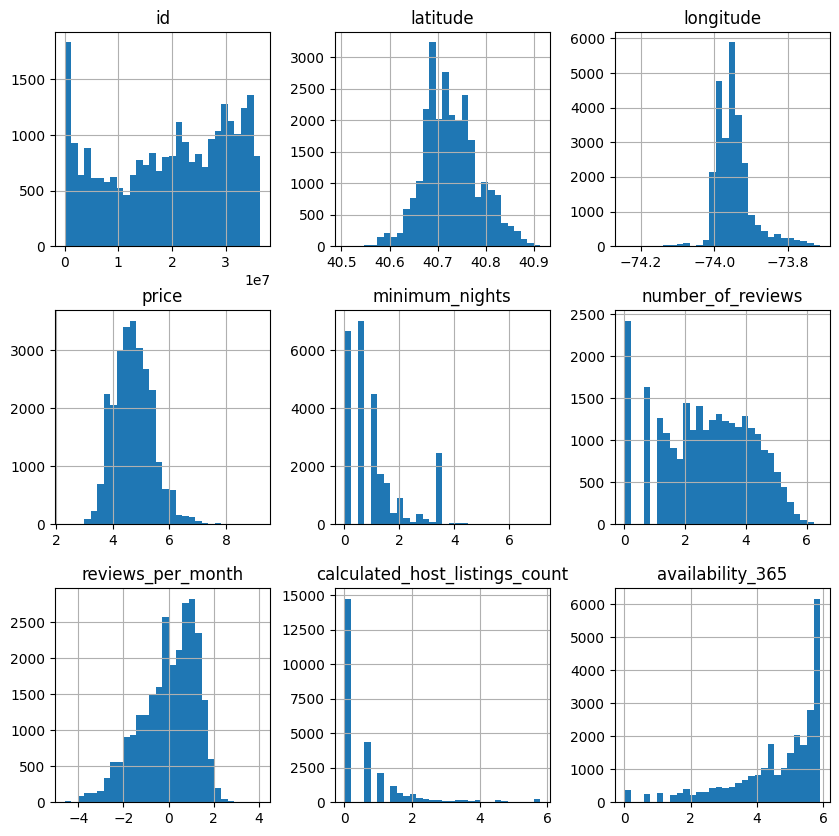

In [78]:
airbnb.hist(figsize = (10,10), bins = 30)

In [79]:
# outliers y valores que no tienen sentido
# ya tomamos una decisione n cuanto a los negativos de availability y la fecha de de last review
numeric_columns = airbnb.select_dtypes(include=['float64', 'int64']).columns

def eliminar_outliers_iqr(df):
    df_clean = df.copy()  # Hacer una copia del DataFrame original
    for column in numeric_columns:
        # Calcular Q1 (percentil 25) y Q3 (percentil 75) para la columna
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar para mantener solo los valores dentro de los límites
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [80]:
# Llamar la función para eliminar los outliers
airbnb_clean = eliminar_outliers_iqr(airbnb)

# Mostrar el DataFrame sin outliers
airbnb_clean

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,3.806662,-0.967584,0.693147,5.872118
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,5.598422,1.534714,0.000000,5.267858
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,4.304065,-0.527633,0.000000,4.859812
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,4.369448,0.693147,6.063785,1.244155,0.000000,5.393628
9,5238,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,5.010635,0.000000,5.075174,0.285179,1.386294,5.236442
...,...,...,...,...,...,...,...,...,...,...,...,...
48701,36390226,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,3.806662,0.000000,0.693147,0.693147,0.000000,2.639057
48732,36411407,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,5.010635,1.386294,0.000000,0.000000,0.000000,2.564949
48740,36413632,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,6.309918,1.098612,0.000000,0.000000,0.000000,5.438079
48782,36425863,Manhattan,Upper East Side,40.78099,-73.95366,Private room,4.859812,0.000000,0.000000,0.000000,0.000000,4.990433


 Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [81]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'room_type'
room_type_order = {
    'Shared room': 0,       # Menor valor
    'Private room': 1,      # Valor intermedio
    'Entire home/apt': 2    # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb_clean['room_type_num'] = airbnb_clean['room_type'].map(room_type_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb_clean[['room_type', 'room_type_num']])



             room_type  room_type_num
1      Entire home/apt              2
3      Entire home/apt              2
5      Entire home/apt              2
7         Private room              1
9      Entire home/apt              2
...                ...            ...
48701     Private room              1
48732  Entire home/apt              2
48740  Entire home/apt              2
48782     Private room              1
48805  Entire home/apt              2

[18859 rows x 2 columns]


In [82]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'neighbourhood_type'
neighbourhood_group_order = {
    'Staten Island': 0,       # Menor valor
    'Bronks': 1,      
    'Queens': 2,           # Valor intermedio
    'Brooklyn': 3,
    'Manhattan': 4       # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb_clean['neighbourhood_group_num'] = airbnb_clean['neighbourhood_group'].map(neighbourhood_group_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb_clean[['neighbourhood_group', 'neighbourhood_group_num']])

      neighbourhood_group  neighbourhood_group_num
1               Manhattan                      4.0
3                Brooklyn                      3.0
5               Manhattan                      4.0
7               Manhattan                      4.0
9               Manhattan                      4.0
...                   ...                      ...
48701            Brooklyn                      3.0
48732           Manhattan                      4.0
48740            Brooklyn                      3.0
48782           Manhattan                      4.0
48805               Bronx                      NaN

[18859 rows x 2 columns]


In [83]:
#- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>
#agrupar por 'neighbourhood_group' y contar la cantidad de oferentes por cada grupo
offer_count = airbnb_clean.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Paso 2: Hacer un merge o join con el DataFrame original para añadir la columna 'offer_group'
airbnb_clean = airbnb_clean.merge(offer_count, on='neighbourhood_group', how='left')
print(offer_count)
airbnb_clean

  neighbourhood_group  offer_group
0               Bronx          449
1            Brooklyn         8696
2           Manhattan         7839
3              Queens         1875


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,offer_group
0,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,0.000000,3.806662,-0.967584,0.693147,5.872118,2,4.0,7839
1,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,0.000000,5.598422,1.534714,0.000000,5.267858,2,3.0,8696
2,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,5.298317,1.098612,4.304065,-0.527633,0.000000,4.859812,2,4.0,7839
3,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,4.369448,0.693147,6.063785,1.244155,0.000000,5.393628,1,4.0,7839
4,5238,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,5.010635,0.000000,5.075174,0.285179,1.386294,5.236442,2,4.0,7839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,36390226,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,3.806662,0.000000,0.693147,0.693147,0.000000,2.639057,1,3.0,8696
18855,36411407,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,5.010635,1.386294,0.000000,0.000000,0.000000,2.564949,2,4.0,7839
18856,36413632,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,6.309918,1.098612,0.000000,0.000000,0.000000,5.438079,2,3.0,8696
18857,36425863,Manhattan,Upper East Side,40.78099,-73.95366,Private room,4.859812,0.000000,0.000000,0.000000,0.000000,4.990433,1,4.0,7839


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

Text(0.5, 1.0, 'Correlation matrix')

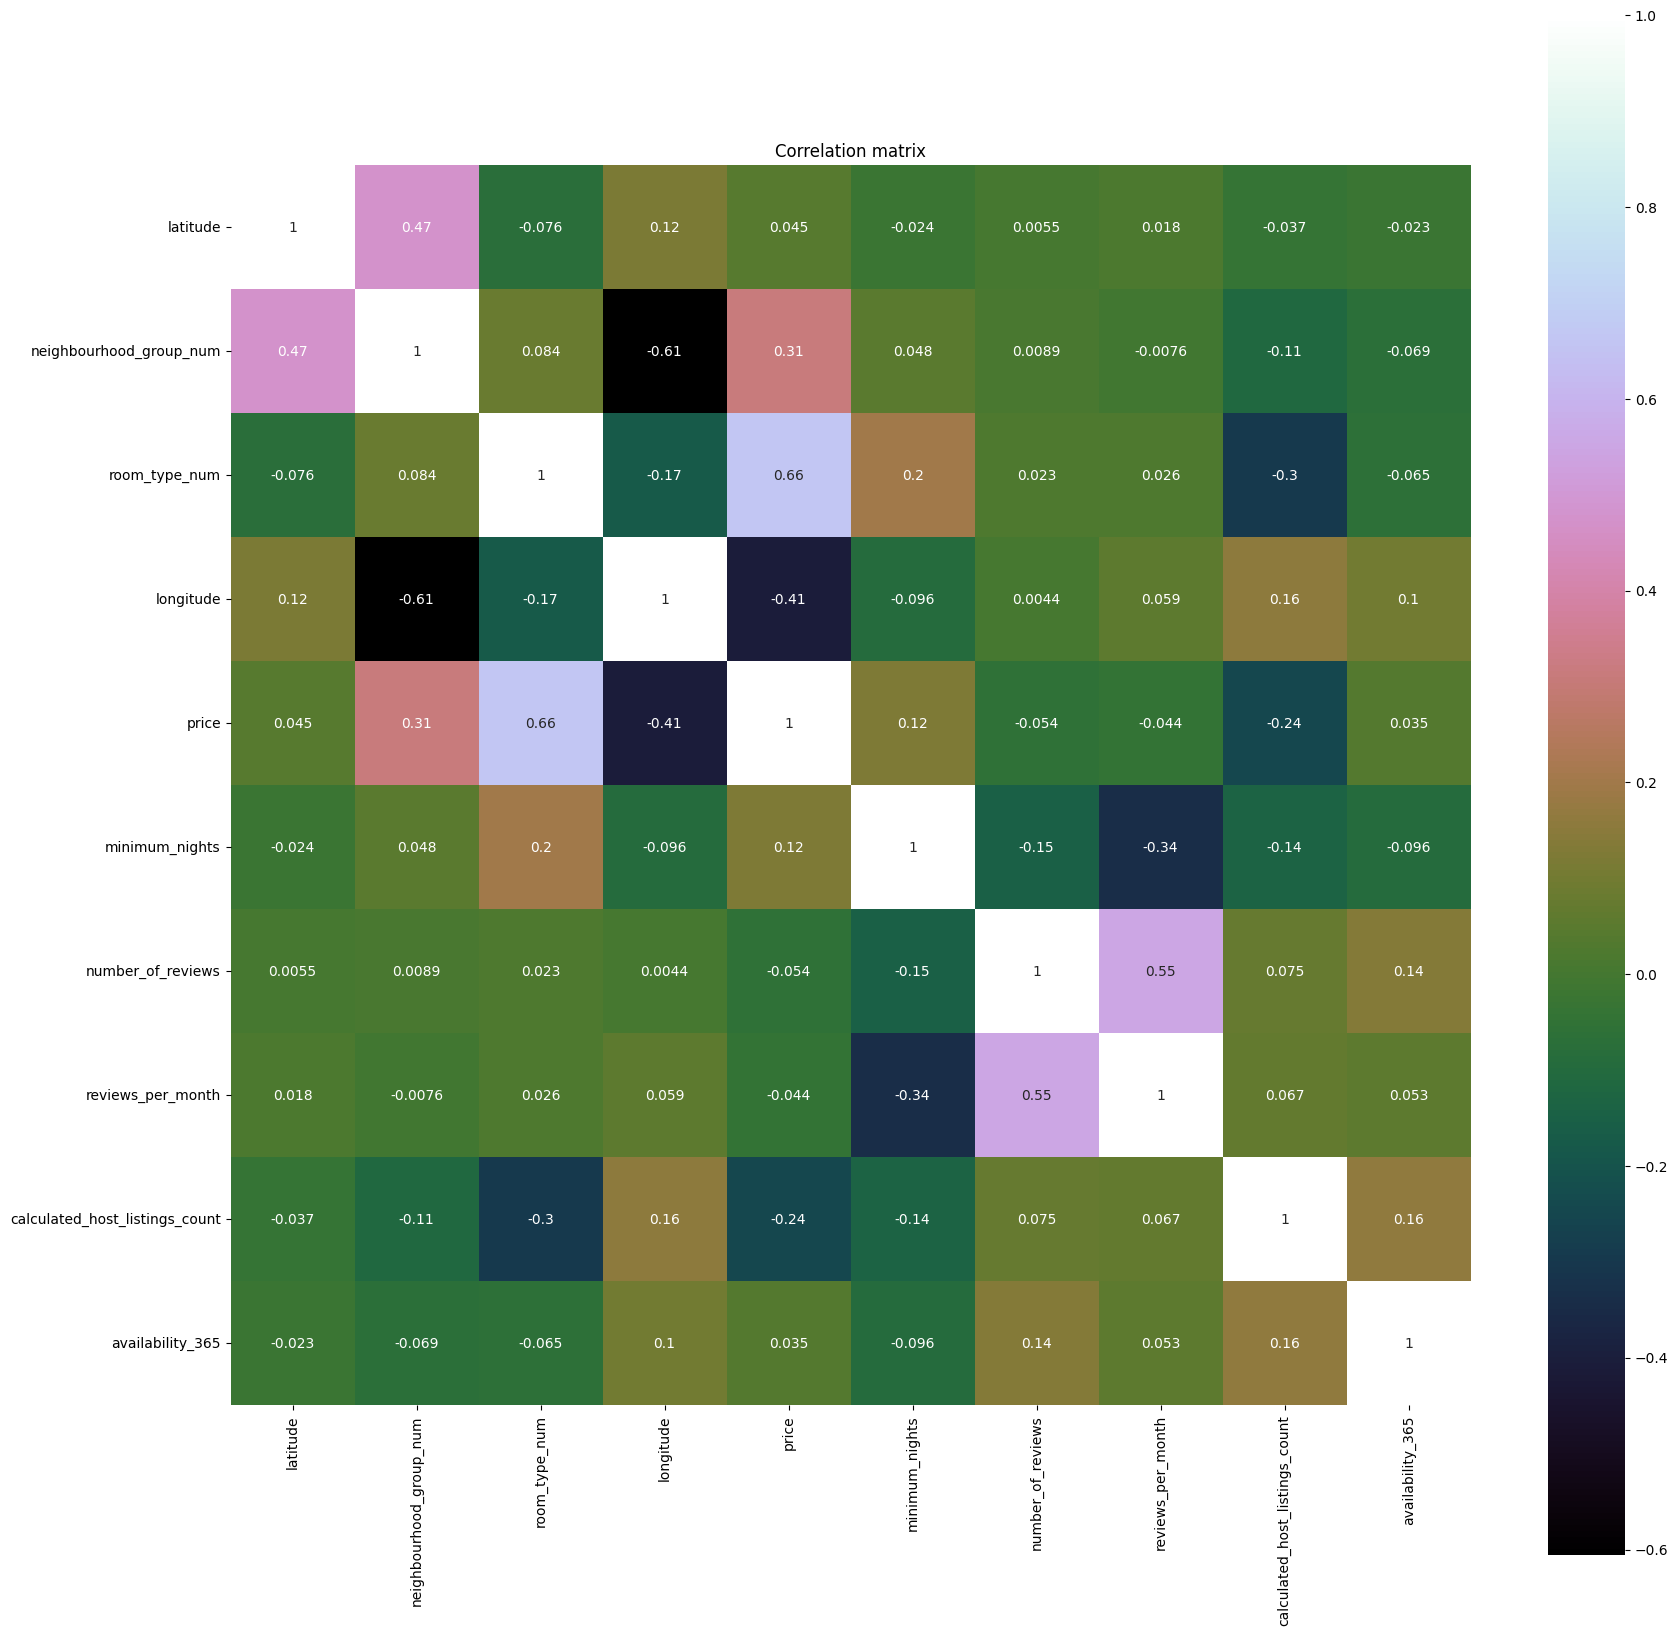

In [84]:
# Resolver acá'
import matplotlib.pyplot as plt
import seaborn as sns
airbnb_var = airbnb_clean[['latitude', 'neighbourhood_group_num', 'room_type_num' ,'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
correlation = airbnb_var.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation matrix')

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Idea: Histograma (chequear si es por habitación en gral o por habitación dentro del neighbourhood group)

neighbourhood_group
Bronx        0.009186
Brooklyn     0.177905
Manhattan    0.160372
Queens       0.038359
Name: offer_group, dtype: float64


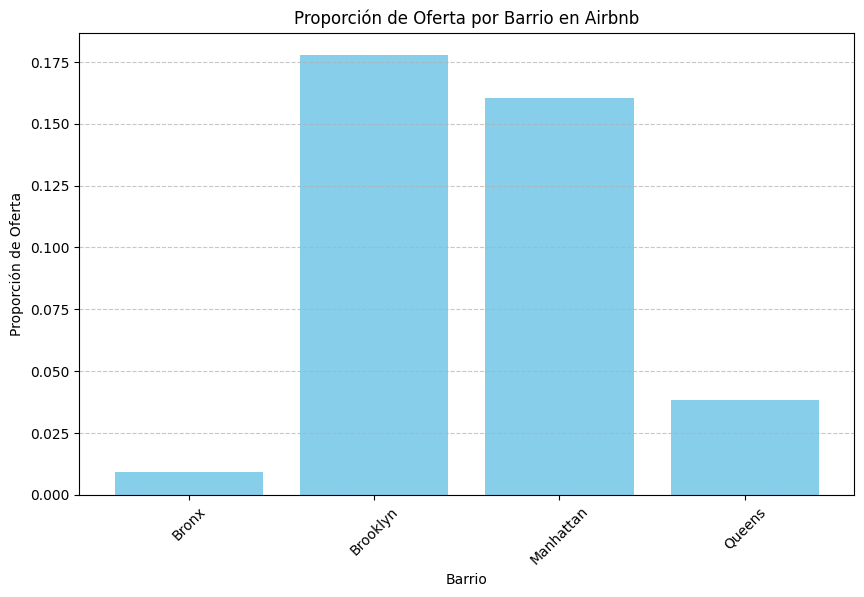

In [85]:
# Resolver acá
total_oferentes = 48880  # Definimos la variable total de oferentes

# Calcular la suma de oferta por cada barrio
oferta_por_barrio = airbnb_clean.groupby('neighbourhood_group')['offer_group'].first()

# Calcular la proporción de oferta por cada barrio
proporcion_oferta = oferta_por_barrio / total_oferentes
print(proporcion_oferta)

# Crear un gráfico de barras con la proporción de oferta por barrio
plt.figure(figsize=(10, 6))
plt.bar(proporcion_oferta.index, proporcion_oferta.values, color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Barrio en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

         room_type  offer_room
0  Entire home/apt        9878
1     Private room        8612
2      Shared room         369
room_type
Entire home/apt    0.202087
Private room       0.176187
Shared room        0.007549
Name: offer_room, dtype: float64


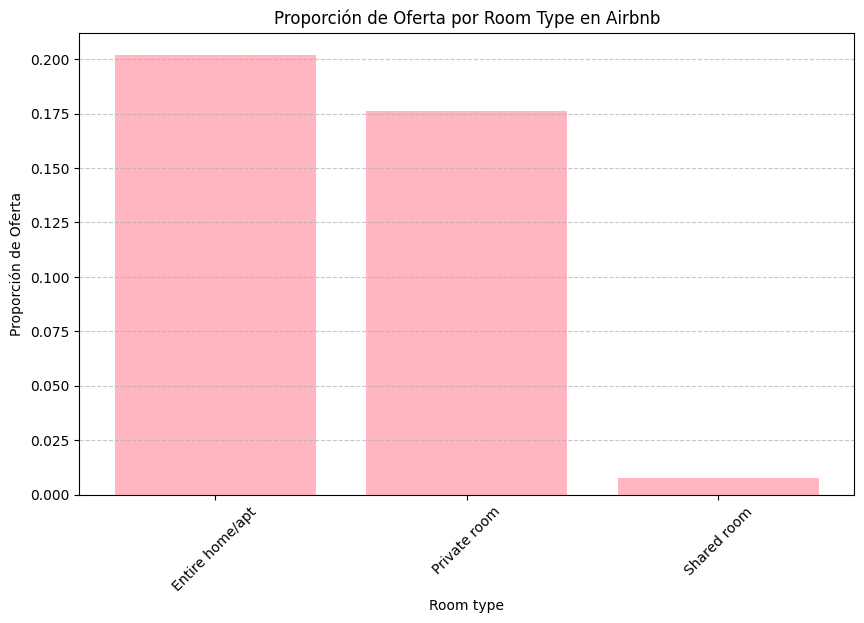

In [86]:
#agrupar por 'room_type' y contar la cantidad de oferentes por cada grupo
offer_per_room = airbnb_clean.groupby('room_type').size().reset_index(name='offer_room')

# Mergeamos 'offer_room' con airbnb_clean
airbnb_clean = airbnb_clean.merge(offer_per_room, on='room_type', how='left')
print(offer_per_room)
airbnb_clean

# Calculamos el total de oferta de los room type
oferta_por_roomtype = airbnb_clean.groupby('room_type')['offer_room'].first()

# Calculamos la proporcion de oferta por room type
proporcion_por_roomtype = oferta_por_roomtype / total_oferentes
print(proporcion_por_roomtype)

# Creamos histograma
plt.figure(figsize=(10, 6))
plt.bar(proporcion_por_roomtype.index, proporcion_por_roomtype.values, color='lightpink')
plt.xlabel('Room type')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Room Type en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

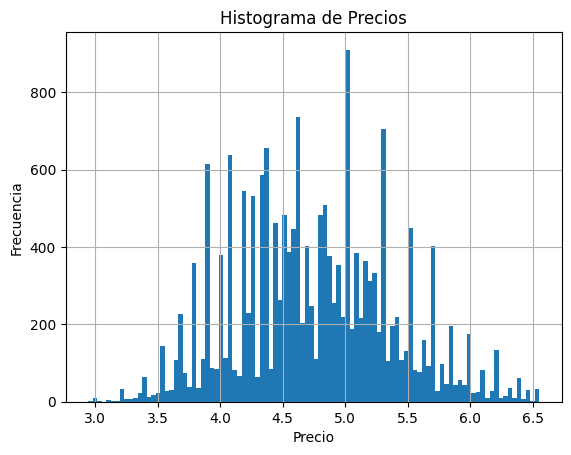

In [96]:
# Resolver acá
airbnb_clean['price'].hist(bins=100)  # Puedes ajustar el número de bins si lo prefieres

# Mostrar el histograma
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

In [97]:
precios = airbnb_clean['price']
print('El precio máximo es:', max(precios))
print('El precio mínimo es: ', min(precios))
print('El precio promedio es: ', np.mean(precios)) 

El precio máximo es: 6.551080335043404
El precio mínimo es:  2.9444389791664403
El precio promedio es:  4.746639350471186


In [98]:
#Media de precio por neigbourhood_group
precios_agrupados = airbnb_clean.groupby('room_type')['price'].agg(['mean'])
print(precios_agrupados)

precios_barrio = airbnb_clean.groupby('neighbourhood_group')['price'].agg(['mean'])
print(precios_barrio)

                     mean
room_type                
Entire home/apt  5.146272
Private room     4.321331
Shared room      3.974792
                         mean
neighbourhood_group          
Bronx                4.170259
Brooklyn             4.640457
Manhattan            4.977619
Queens               4.411445


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

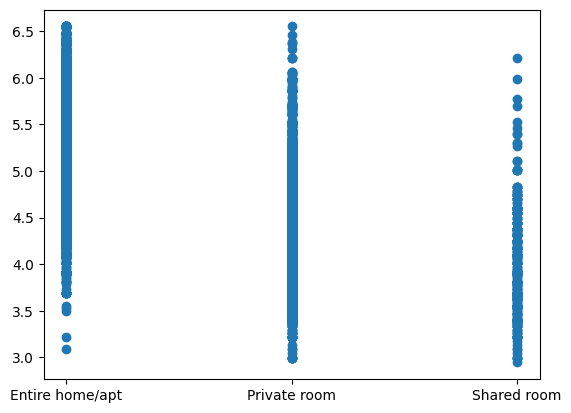

In [99]:
# Resolver acá

plt.scatter(airbnb_clean['room_type'],airbnb_clean['price'])

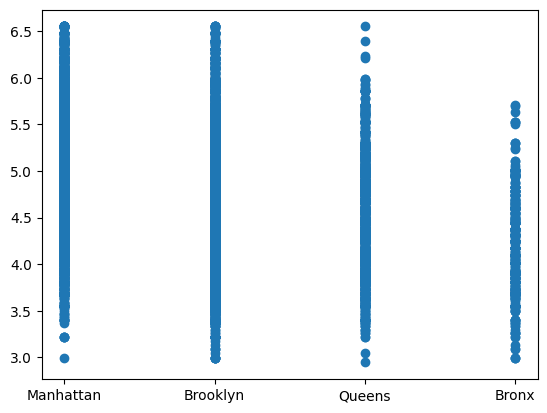

In [100]:
plt.scatter(airbnb_clean['neighbourhood_group'],airbnb_clean['price'])

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [102]:
# Resolver acá
# Inicializamos el transformador 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform
airbnb_transformed = pd.DataFrame(scaler.fit_transform(airbnb_var), columns=airbnb_var.columns)
airbnb_transformed = airbnb_transformed.dropna()
pca = PCA()
airbnb_pca = pca.fit_transform(airbnb_transformed) 
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)
# Loadings vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1

Varianza explicada: [0.23960575 0.17487676 0.14036551 0.10681951 0.09234277 0.08456221
 0.07403368 0.04039093 0.02772842 0.01927445]
Loadings:
 [[ 0.14553804  0.40694668  0.41346625 -0.40961639  0.49843802  0.24630497
  -0.13941979 -0.1664171  -0.31689947 -0.13344942]
 [ 0.16298905  0.26131993  0.08736937 -0.1618112   0.14774957 -0.35748594
   0.57053925  0.60566518  0.05003488  0.16387561]
 [ 0.49249609  0.51846565 -0.51753114 -0.20085435 -0.26134385 -0.09651285
  -0.16576197 -0.15750091  0.19388168 -0.11389036]
 [-0.07168408  0.0707839   0.01121976 -0.11072988  0.23266129  0.03393886
  -0.10093082 -0.24062087  0.43558873  0.81508156]
 [ 0.68417394 -0.06195092  0.15371366  0.60847981  0.07518781  0.12194639
   0.00509625 -0.0141087  -0.23478368  0.24149535]
 [-0.00900871  0.06975923 -0.08434395 -0.06433947 -0.21589612  0.82992484
   0.48091513  0.04155132  0.12267709  0.01889736]
 [ 0.15711243 -0.03594212  0.30883348  0.1765905   0.22850469  0.04330125
  -0.07202717  0.06670141  0.772

0.14553803806413532

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [112]:
# Resolver acá
from sklearn.model_selection import train_test_split
airbnb_var = airbnb_var.dropna()
# Definimos variables
X = airbnb_var.drop(columns=['price'])  # Todas las variables menos 'price'
y = airbnb_var['price']  # Variable dependiente

# Agregamos la columna de unos
X['ones'] = 1

# Dividimos el dataset en 70% entrenamiento y 30% prueba con semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=201)

# Mostrar las dimensiones de los conjuntos para verificar
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")
print(f"Vector de entrenamiento (y_train): {y_train.shape}")
print(f"Vector de prueba (y_test): {y_test.shape}")

Conjunto de entrenamiento (X_train): (12887, 10)
Conjunto de prueba (X_test): (5523, 10)
Vector de entrenamiento (y_train): (12887,)
Vector de prueba (y_test): (5523,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [117]:
# Resolver acá
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Hacemos modelo lienal
model = LinearRegression()

# Entrenamos al modelo
model.fit(X_train, y_train)

# Hacemos las predicciones con los datos entrenamiento
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluamos el modelo con R^2 y MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print("Evaluación en el conjunto de entrenamiento:")
print(f"R² (train): {r2_train}")
print(f"Error medio cuadrado (MSE, train): {mse_train}")
print("\nEvaluación en el conjunto de prueba:")
print(f"R² (test): {r2_test}")
print(f"Error medio cuadrado (MSE, test): {mse_test}")

# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': model.coef_})
print("\nCoeficientes del modelo de regresión lineal:")
print(coeficientes)

Evaluación en el conjunto de entrenamiento:
R² (train): 0.5678012898304869
Error medio cuadrado (MSE, train): 0.16865256923469255

Evaluación en el conjunto de prueba:
R² (test): 0.5607108875496583
Error medio cuadrado (MSE, test): 0.17363193088511558

Coeficientes del modelo de regresión lineal:
                         Variable  Coeficiente
0                        latitude     1.516400
1         neighbourhood_group_num     0.034016
2                   room_type_num     0.733188
3                       longitude    -5.543148
4                  minimum_nights    -0.035439
5               number_of_reviews    -0.033742
6               reviews_per_month    -0.012320
7  calculated_host_listings_count    -0.033947
8                availability_365     0.066124
9                            ones     0.000000


## Análisis de los resultados

R2 explica que más de la mitad de la variabilidad de los datos es explicada con el modelo y que, como el MSE dio bajo, significa que hay poca diferencia entre los datos predichos y los reales. Esto sucedió tanto con los datos de training como con los de evaluación, dando a entender que este es un buen modelo de predicción.

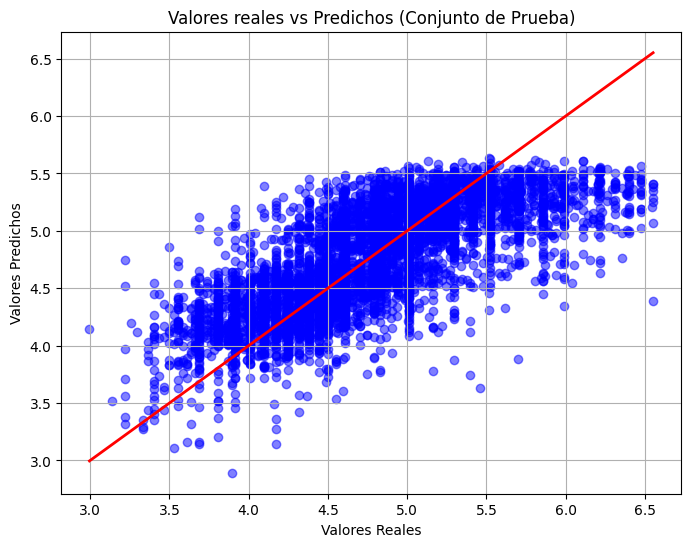

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Línea 45 grados
plt.title('Valores reales vs Predichos (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()